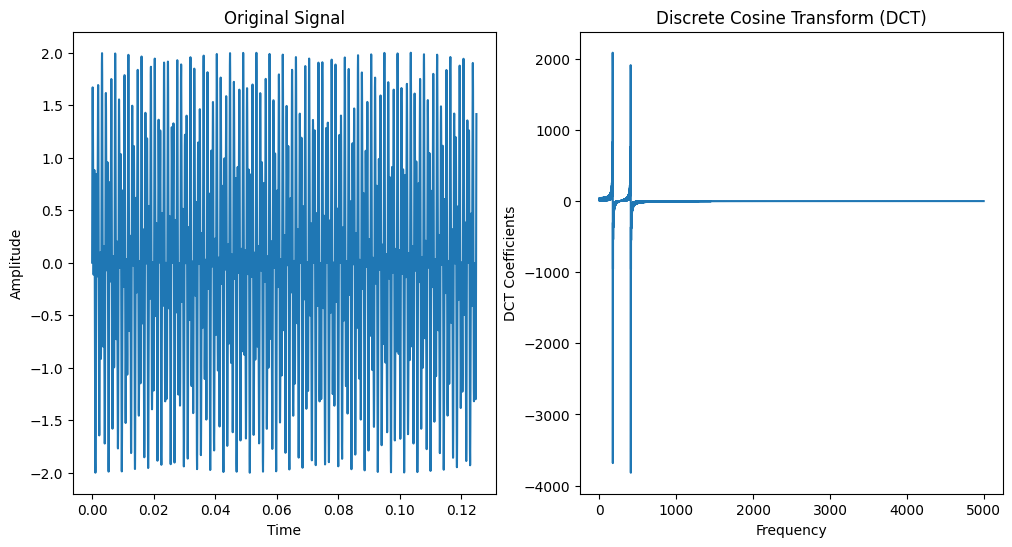

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import dct
n = 5000
t = np.linspace(0, 1/8, n)
f = np.sin(1394*np.pi*t) + np.sin(3266*np.pi*t)
ft = dct(f)

# Plotting the original signal and its DCT
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, f)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(ft)
plt.title('Discrete Cosine Transform (DCT)')
plt.xlabel('Frequency')
plt.ylabel('DCT Coefficients')

plt.show()


In [2]:
import numpy as np
import cvxpy as cp
from scipy.fftpack import dct

# Define parameters
n = 5000
m = 500
r1 = np.random.permutation(n)
perm = r1[:m]

f2 = f[perm]
t2 = t[perm]

D = dct(np.eye(n))
A = D[perm, :]

x = np.linalg.pinv(A) @ f2
x2 = np.linalg.lstsq(A, f2, rcond=None)[0]
x3 = cp.Variable(n)
objective = cp.Minimize(cp.norm(x3, 1))
constraints = [A @ x3 == f2]
problem = cp.Problem(objective, constraints)
problem.solve()

# Compute DCT of the solutions
sig1 = dct(x)
sig2 = dct(x2)
sig3 = dct(x3.value)


ModuleNotFoundError: No module named 'cvxpy'